 # Spatial Analysis of Kurdish Group Rights Demands

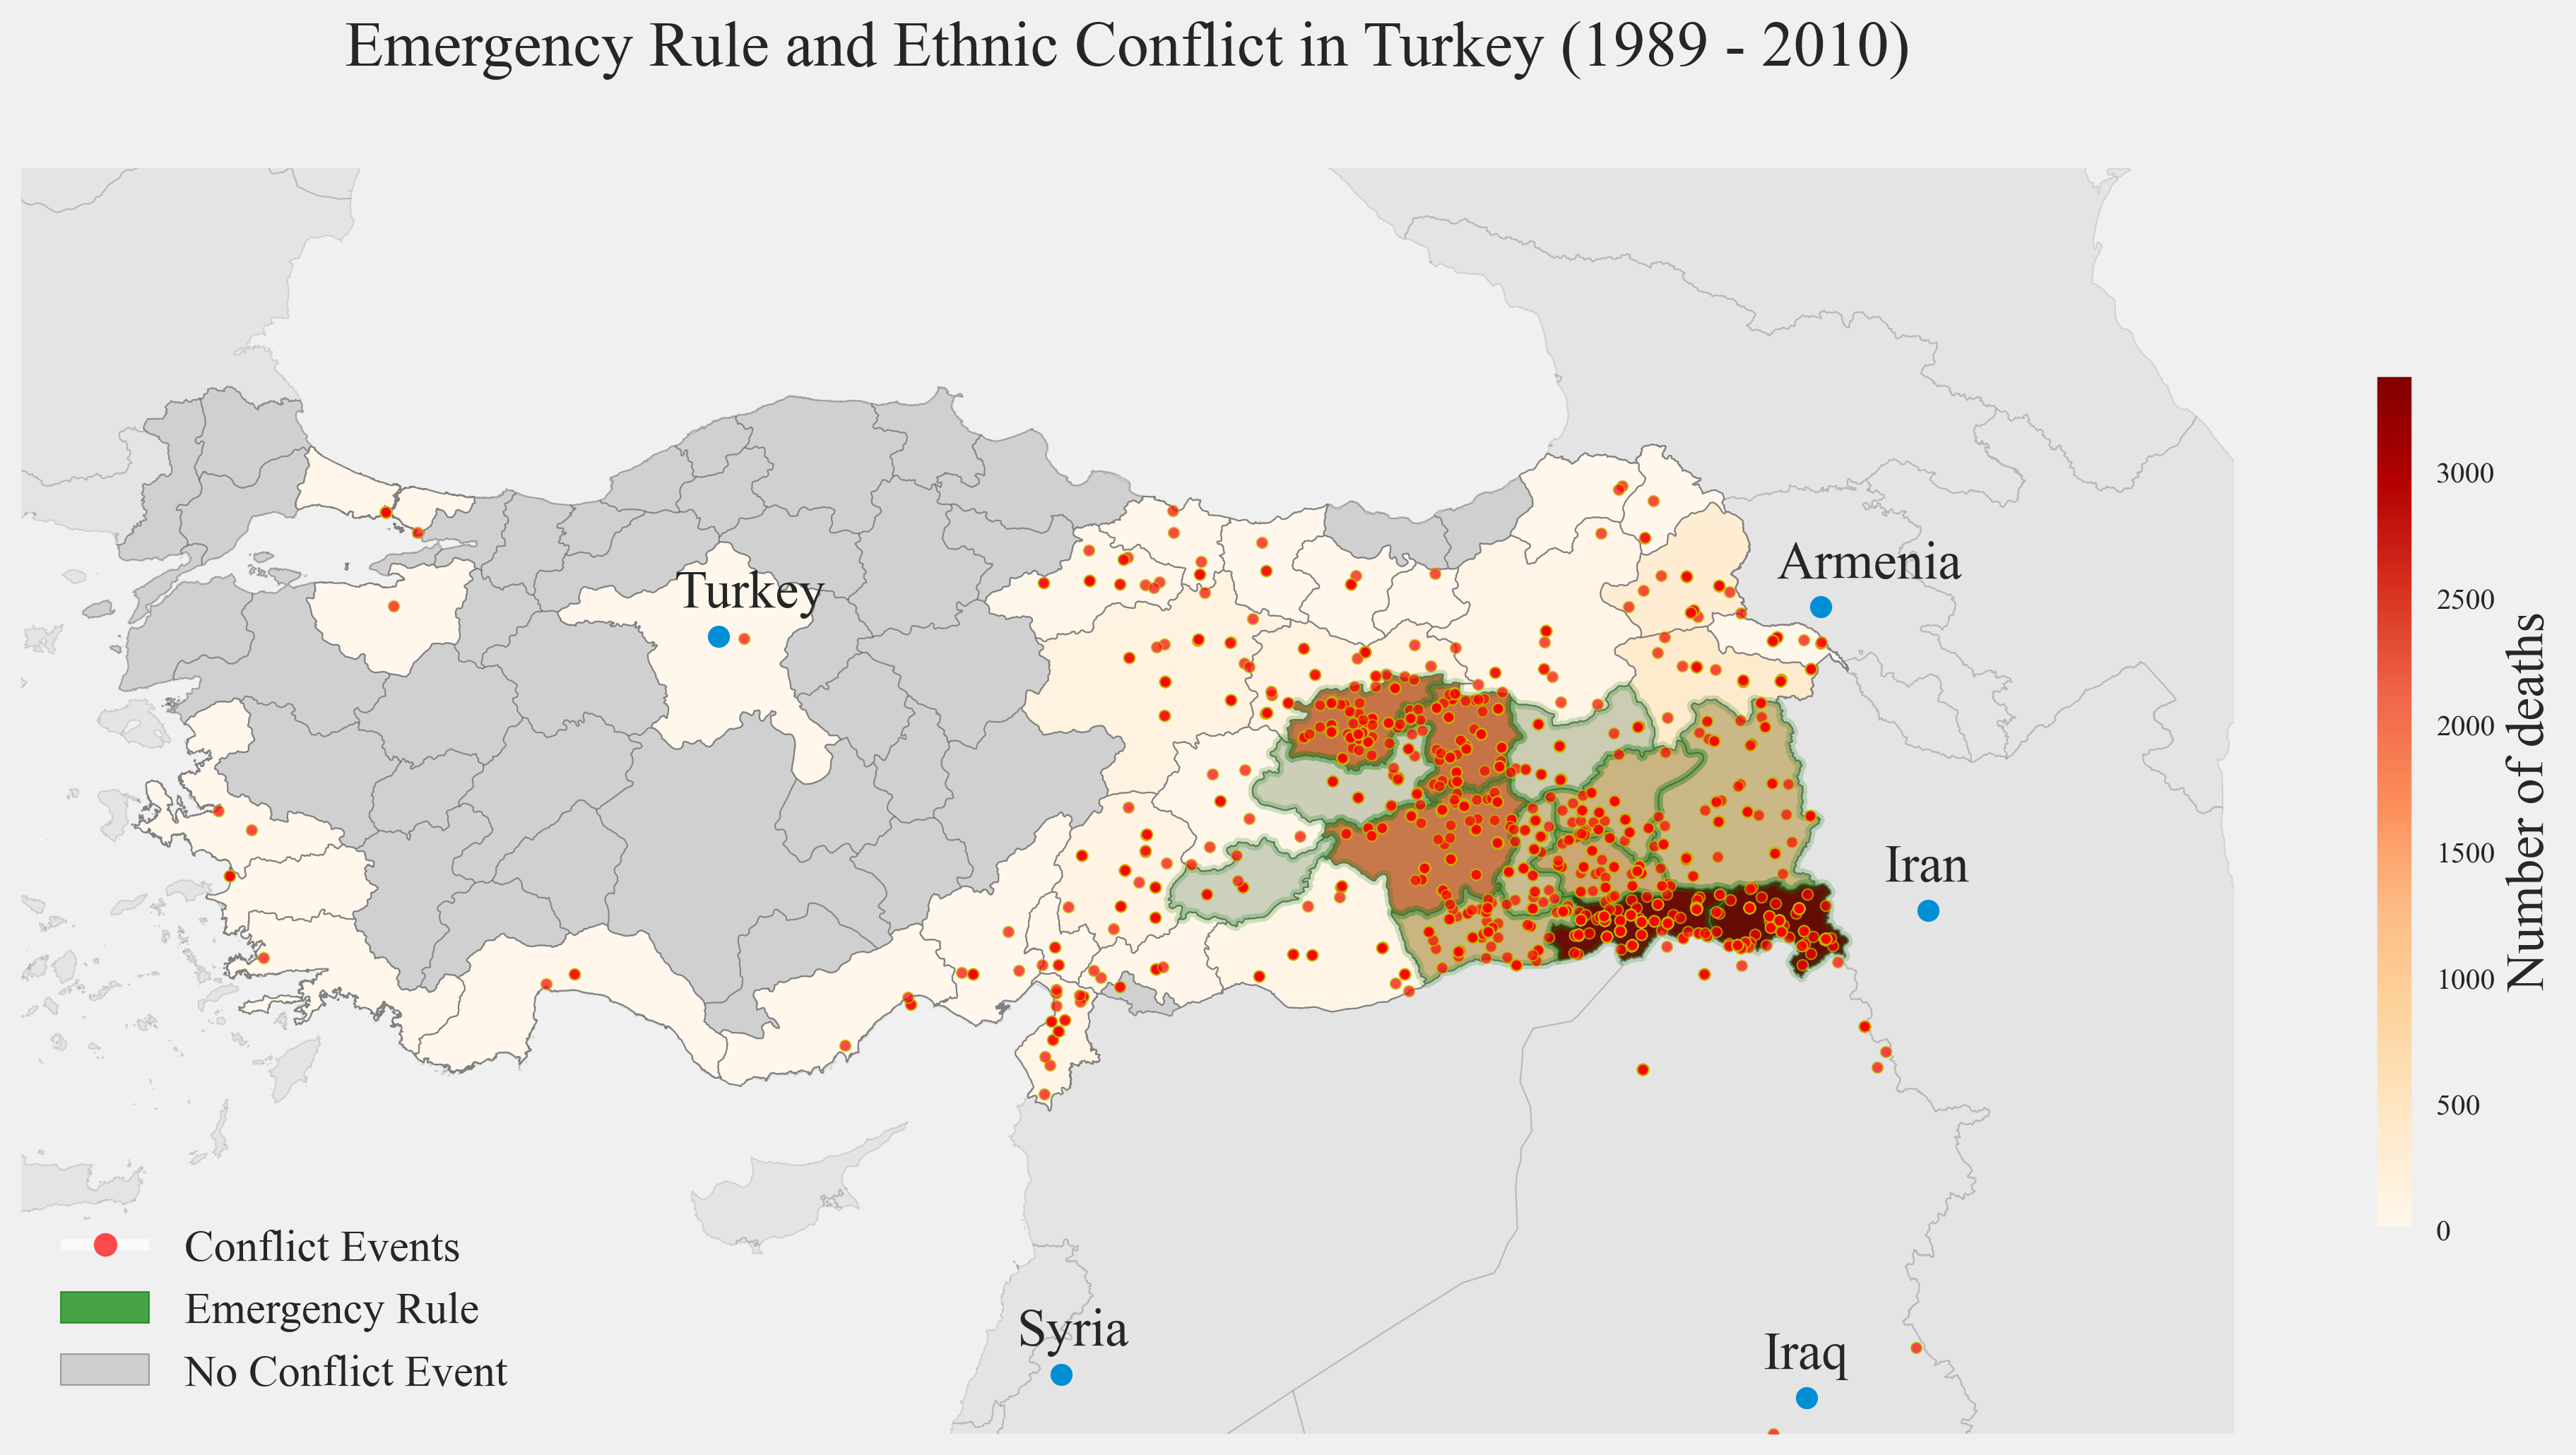

In [47]:
from IPython import display
display.Image("/image.png")

In [2]:
import pandas as pd
import numpy as np
import geopandas as gpd

import matplotlib.pyplot as plt
import seaborn as sns

## Descriptive Statistics by Provinces

In [3]:
df= pd.read_stata('/Users/oneryigit/Desktop/kurd2011/kurd_r_ucpd.dta')

df.head()

,majority,adm_1,soru34,border_city,rebelsup,PKKnotteror,PKKrep,PKKpolitical,issiz,DiscKurd,...,ohal,zorunlugoc_and_ohal,goc_from_ohal,v1,deaths_a,deaths_b,deaths_civilians,event_n,goc_from_border,zorunlugoc_and_border
0,0.0,Adana,1.0,0.0,1.0,1.0,1.0,1.0,diger,1.0,...,0.0,0.0,0.0,0.0,13.0,5.0,3.0,10.0,0.0,0.0
1,0.0,Adana,1.0,0.0,0.0,0.0,0.0,0.0,diger,0.0,...,0.0,0.0,0.0,0.0,13.0,5.0,3.0,10.0,0.0,0.0
2,0.0,Adana,1.0,0.0,0.0,0.0,0.0,0.0,diger,0.0,...,0.0,0.0,0.0,0.0,13.0,5.0,3.0,10.0,0.0,0.0
3,0.0,Adana,1.0,0.0,0.0,0.0,0.0,0.0,diger,0.0,...,0.0,0.0,0.0,0.0,13.0,5.0,3.0,10.0,0.0,0.0
4,0.0,Adana,1.0,0.0,0.0,0.0,0.0,0.0,diger,0.0,...,0.0,0.0,0.0,0.0,13.0,5.0,3.0,10.0,0.0,0.0


In [4]:
df2 = df.replace(r'^\s*$', np.nan, regex=True)

df2 = df2[df2['adm_1'].notnull()]

df2.head()

,majority,adm_1,soru34,border_city,rebelsup,PKKnotteror,PKKrep,PKKpolitical,issiz,DiscKurd,...,ohal,zorunlugoc_and_ohal,goc_from_ohal,v1,deaths_a,deaths_b,deaths_civilians,event_n,goc_from_border,zorunlugoc_and_border
0,0.0,Adana,1.0,0.0,1.0,1.0,1.0,1.0,diger,1.0,...,0.0,0.0,0.0,0.0,13.0,5.0,3.0,10.0,0.0,0.0
1,0.0,Adana,1.0,0.0,0.0,0.0,0.0,0.0,diger,0.0,...,0.0,0.0,0.0,0.0,13.0,5.0,3.0,10.0,0.0,0.0
2,0.0,Adana,1.0,0.0,0.0,0.0,0.0,0.0,diger,0.0,...,0.0,0.0,0.0,0.0,13.0,5.0,3.0,10.0,0.0,0.0
3,0.0,Adana,1.0,0.0,0.0,0.0,0.0,0.0,diger,0.0,...,0.0,0.0,0.0,0.0,13.0,5.0,3.0,10.0,0.0,0.0
4,0.0,Adana,1.0,0.0,0.0,0.0,0.0,0.0,diger,0.0,...,0.0,0.0,0.0,0.0,13.0,5.0,3.0,10.0,0.0,0.0


In [5]:
df2.class_lca

0      4.0
1      3.0
2      3.0
3      3.0
4      3.0
      ... 
963    1.0
964    3.0
965    4.0
966    3.0
967    4.0
Name: class_lca, Length: 905, dtype: float64

In [6]:
number_of_participants=df2.groupby(['adm_1','soru34']).agg({'soru34':'count'})
number_of_participants.head()

,,soru34
adm_1,soru34,
Adana,1.0,10
AdÄ±yaman,2.0,20
Ankara provicne,6.0,14
Ardahan,75.0,4
AydÄ±n,9.0,2


In [7]:
number_of_participants=number_of_participants.rename({'soru34':'participants'}, axis=1).reset_index()

number_of_participants.head()

,adm_1,soru34,participants
0,Adana,1.0,10
1,AdÄ±yaman,2.0,20
2,Ankara provicne,6.0,14
3,Ardahan,75.0,4
4,AydÄ±n,9.0,2


In [8]:
df3=df2[['adm_1', 'class_lca']]

df3.head()

,adm_1,class_lca
0,Adana,4.0
1,Adana,3.0
2,Adana,3.0
3,Adana,3.0
4,Adana,3.0


In [9]:
df4=df3.sort_values(by=['adm_1', 'class_lca'])

df4.head()

,adm_1,class_lca
9,Adana,1.0
1,Adana,3.0
2,Adana,3.0
3,Adana,3.0
4,Adana,3.0


In [10]:
df4.class_lca.value_counts()

4.0    368
3.0    198
2.0    198
1.0    141
Name: class_lca, dtype: int64

In [11]:
cross_tab=pd.crosstab(df4.adm_1, df4.class_lca)
cross_tab.head()

class_lca,1.0,2.0,3.0,4.0
adm_1,,,,
Adana,1,0,7,2
AdÄ±yaman,3,4,7,6
Ankara provicne,2,3,7,2
Ardahan,1,0,2,1
AydÄ±n,1,1,0,0


In [12]:
cross_tab=cross_tab.rename(columns={1.0:'No Demand', 2.0:'Socio-Cultural Demand', 3.0:'Decentralization', 4.0:'Full Scale Demand'})
cross_tab.head()

class_lca,No Demand,Socio-Cultural Demand,Decentralization,Full Scale Demand
adm_1,,,,
Adana,1,0,7,2
AdÄ±yaman,3,4,7,6
Ankara provicne,2,3,7,2
Ardahan,1,0,2,1
AydÄ±n,1,1,0,0


In [13]:
cross_tab=cross_tab.reset_index()
cross_tab.head()

class_lca,adm_1,No Demand,Socio-Cultural Demand,Decentralization,Full Scale Demand
0,Adana,1,0,7,2
1,AdÄ±yaman,3,4,7,6
2,Ankara provicne,2,3,7,2
3,Ardahan,1,0,2,1
4,AydÄ±n,1,1,0,0


In [14]:
cross_tab= cross_tab.sort_values(by=['Full Scale Demand', 'Decentralization', 'Socio-Cultural Demand', 'No Demand',],ascending=False)
cross_tab.head()


class_lca,adm_1,No Demand,Socio-Cultural Demand,Decentralization,Full Scale Demand
9,DiyarbakÄ±r,5,47,25,96
6,Batman,2,25,6,79
20,Mardin,5,21,10,53
24,Siirt,0,4,6,22
7,BingÃ¶l,15,15,20,15


In [15]:
cross_tab.loc[9,'adm_1']='Diyarbakır'
cross_tab.loc[7,'adm_1']='Bingöl'
cross_tab.loc[31,'adm_1']='Şanlıurfa'
cross_tab.loc[5,'adm_1']='Ağrı'
cross_tab.loc[22,'adm_1']='Muş'
cross_tab.loc[1,'adm_1']='Adıyaman'
cross_tab.loc[32,'adm_1']='Şırnak'
cross_tab.loc[10,'adm_1']='Elazığ'
cross_tab.loc[2,'adm_1']='Ankara'
cross_tab.loc[16,'adm_1']='Iğdır'
cross_tab.loc[29,'adm_1']='İstanbul'
cross_tab.loc[17,'adm_1']='Kahramanmaraş'
cross_tab.loc[4,'adm_1']='Aydın'
cross_tab.loc[30,'adm_1']='İzmir'

In [16]:
cross_tab.head()

class_lca,adm_1,No Demand,Socio-Cultural Demand,Decentralization,Full Scale Demand
9,Diyarbakır,5,47,25,96
6,Batman,2,25,6,79
20,Mardin,5,21,10,53
24,Siirt,0,4,6,22
7,Bingöl,15,15,20,15


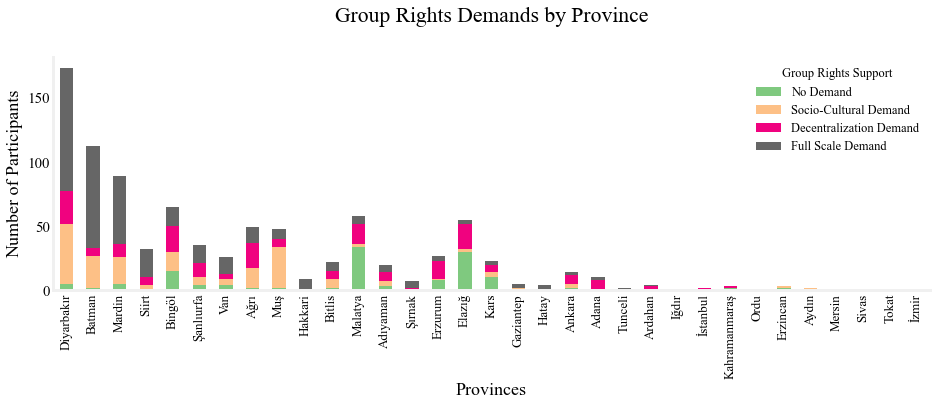

In [45]:
# reset the plot configurations to default
#plt.rcdefaults()

plt.style.use('fivethirtyeight')
plt.rcParams.update({'font.size': 15}) #to set font size for all properties of plot
plt.rcParams.update({'font.sans-serif':'Times New Roman'}) #or 'helvetica'

fig, ax = plt.subplots(figsize=(14,4))

cross_tab.plot(ax=ax, kind='bar', stacked=True, cmap='Accent')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.set_title('Group Rights Demands by Province', pad=35)
ax.set_xlabel('Provinces')
ax.set_ylabel('Number of Participants')
plt.legend(['No Demand','Socio-Cultural Demand', 'Decentralization Demand','Full Scale Demand'], frameon=False,title= 'Group Rights Support',fontsize='small',fancybox=True, title_fontsize=r'small')
ax.set_xticklabels(cross_tab.adm_1, size=13);
ax.axis()
ax.grid(False)

#plt.axis('off')
#fig.tight_layout()
ax.set_facecolor("w")
fig.set_facecolor('w')
fig.savefig('group_rights_demands_by_province_2011.png',bbox_inches='tight', dpi=300);
fig.savefig('group_rights_demands_by_province_2011.pdf',bbox_inches='tight', dpi=300);

In [18]:
#75 percent of those who demand full scale rights are from ohal cities.  
df5=pd.crosstab(df.ohal, df.class_lca, normalize='columns')
df5
#61 percent of those who have no demand are from non-ohal cities.  


class_lca,1.0,2.0,3.0,4.0
ohal,,,,
0.0,0.604651,0.2,0.5,0.143243
1.0,0.395349,0.8,0.5,0.856757


In [19]:
df5.iloc[0,0]=60
df5.iloc[0,1]=20
df5.iloc[0,2]=50
df5.iloc[0,3]=14
df5.iloc[1,0]=39
df5.iloc[1,1]=80
df5.iloc[1,2]=50
df5.iloc[1,3]=85

df5

class_lca,1.0,2.0,3.0,4.0
ohal,,,,
0.0,60.0,20.0,50.0,14.0
1.0,39.0,80.0,50.0,85.0


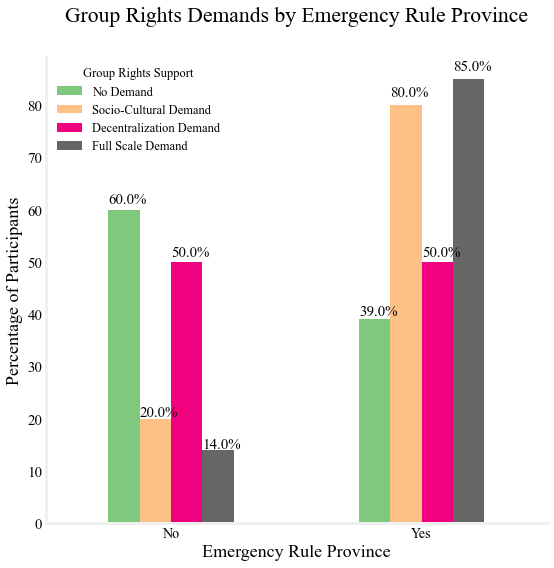

In [20]:
# reset the plot configurations to default
#plt.rcdefaults()

plt.style.use('fivethirtyeight')
plt.rcParams.update({'font.size': 15}) #to set font size for all properties of plot
plt.rcParams.update({'font.sans-serif':'Times New Roman'}) #or 'helvetica'

fig, ax = plt.subplots(figsize=(8,8))

plot=df5.plot(ax=ax, kind='bar', stacked=False, cmap='Accent')


for p in plot.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height}''%', (x + width/1.6, y + height*1.02), ha='center')


ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.set_title('Group Rights Demands by Emergency Rule Province',pad=35)
ax.set_xlabel('Emergency Rule Province')
ax.set_ylabel('Percentage of Participants')
plt.legend(['No Demand','Socio-Cultural Demand', 'Decentralization Demand','Full Scale Demand'], 
           title= 'Group Rights Support',fontsize='small',fancybox=False, title_fontsize='small',
          frameon=False, loc='best')
ax.set_xticklabels(['No', 'Yes'], size=14, rotation=0);
# ax.axis()
ax.grid(False)

# #plt.axis('off')
#fig.tight_layout()
ax.set_facecolor("w")
fig.set_facecolor('w')
# fig.savefig('group_rights_demands_by_province.png',bbox_inches='tight', dpi=300);
# fig.savefig('group_rights_demands_by_province.pdf',bbox_inches='tight', dpi=300);

# Using 2011 survey Data and UCPD event data

In [21]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns


## Subseting UCPD 

In [22]:
ucpd= pd.read_csv('ged211.csv')

/var/folders/lb/87v_57_5429939_f527p9dvr0000gn/T/ipykernel_30995/3221399008.py:1: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  ucpd= pd.read_csv('ged211.csv')


In [23]:
ucpd = ucpd[ucpd['side_a'] == 'Government of Turkey']

In [24]:
ucpd_2010=ucpd[ucpd.year<2011]

In [25]:
ucpd_2010_pkk = ucpd_2010[ucpd_2010['side_b'].apply(lambda val: all(val != s for s in ['MKP', 'DHKP-C']))]

## Turkey shapefile loading

In [26]:
tr_geo=gpd.read_file('turkey shape/tur_polbnda_adm1.shp')


<AxesSubplot:>

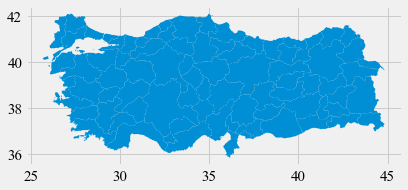

In [27]:
tr_geo.plot()

In [28]:
#Transforming UCPD Dataset as geo-data frame

gs = gpd.GeoSeries.from_wkt(ucpd_2010_pkk['geom_wkt'])
geo_event = gpd.GeoDataFrame(ucpd_2010_pkk, geometry=gs, crs="EPSG:4326")


<AxesSubplot:>

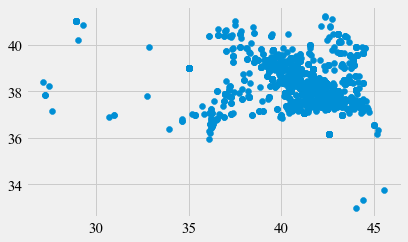

In [29]:
geo_event.plot()

In [30]:
#For some reasons where were some event points that did not match with the map.
#Upon checing they did not have proper province location. So I droped them.
#Nevsehir and Konya

geo_event=geo_event.drop(index=252568, axis=0)

geo_event[(geo_event.longitude>33)&(geo_event.longitude<35.9) & 
          (geo_event.latitude>38)&(geo_event.latitude<40)].index

geo_event=geo_event.drop(index=geo_event[(geo_event.longitude>33)&(geo_event.longitude<35.9) & 
          (geo_event.latitude>38)&(geo_event.latitude<40)].index)

## World shapefile loading

In [31]:
#This will be the first layer of our map. 
world = gpd.read_file('IPUMSI_world_release2020/world_countries_2020.shp')


<AxesSubplot:>

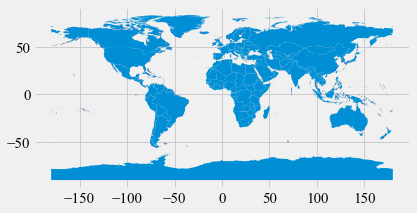

In [32]:
world.plot() #here is the world!

In [33]:
#Okay here, to plot names of countries, I enter coordinates of capitals
#Some capitals were far away, in that case, I use another close city point (e.g. iran)
cities={'city':['Turkey', 'Syria', 'Iran', 'Iraq','Armenia'],
    'longitude':[32.5597, 36.2765, 45.6786,44.3661, 44.5152],
    'latitude':[39.9334, 33.5138, 37.54982,33.3152,40.1872]}

cities_df=pd.DataFrame(cities)

cities_df

,city,longitude,latitude
0,Turkey,32.5597,39.93340
1,Syria,36.2765,33.51380
2,Iran,45.6786,37.54982
3,Iraq,44.3661,33.31520
4,Armenia,44.5152,40.18720


<AxesSubplot:>

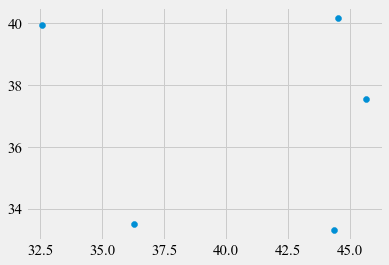

In [34]:
#turn cities_df into a geo dataframe from xy coordinates. 
city_geo = gpd.GeoDataFrame(cities_df, 
                            geometry=gpd.points_from_xy(cities_df.longitude,cities_df.latitude),
                            crs="EPSG:4326")

city_geo.plot() #these are actually city points

## Aggrageting UCPD event datasets in city level

In [35]:
#this is an important step. I aggragate number of conflict in each city with intensity level
agg_ucpd=geo_event.groupby(by='adm_1').agg({'deaths_a':'sum','deaths_b':'sum', 'deaths_civilians':'sum', 'id':'count'})

agg_ucpd.reset_index(inplace=True)

agg_ucpd.adm_1=agg_ucpd.adm_1.str.replace(' province','')

#I already saved it and did some modifications. such as adding city plaka no.
#agg_ucpd.to_csv('agg_ucpd.csv') 

In [36]:
agg_ucpd.head() #ohal and soru34 are added later on

,adm_1,deaths_a,deaths_b,deaths_civilians,id
0,Adana,13,5,3,10
1,Adıyaman,5,51,2,13
2,Ankara provicne,1,0,0,1
3,Antalya,2,11,0,3
4,Arbīl,0,21,0,1


## Ohal emergency rule 

In [37]:
#Load the saved data. 
agg_ucpd= pd.read_stata('agg_ucdp.dta')


In [38]:
agg_ucpd.head()

,v1,adm_1,soru34,deaths_a,deaths_b,deaths_civilians,id
0,0,Adana,1,13,5,3,10
1,1,AdÄ±yaman,2,5,51,2,13
2,9,AÄrÄ±,4,50,329,2,51
3,2,Ankara provicne,6,1,0,0,1
4,3,Antalya,7,2,11,0,3


In [39]:
#I created a variable called 'ohal'=0
#then I manually enter the ohal cities=1
agg_ucpd.loc[1,'ohal']=1
agg_ucpd.loc[36,'ohal']=1
agg_ucpd.loc[7,'ohal']=1
agg_ucpd.loc[8,'ohal']=1
agg_ucpd.loc[10,'ohal']=1
agg_ucpd.loc[11,'ohal']=1
agg_ucpd.loc[17,'ohal']=1
agg_ucpd.loc[25,'ohal']=1
agg_ucpd.loc[27,'ohal']=1
agg_ucpd.loc[32,'ohal']=1
agg_ucpd.loc[34,'ohal']=1
agg_ucpd.loc[37,'ohal']=1
agg_ucpd.loc[29,'ohal']=1

In [40]:
tr_geo.adm1

0     TUR001
1     TUR002
2     TUR003
3     TUR004
4     TUR068
       ...  
76    TUR064
77    TUR065
78    TUR077
79    TUR066
80    TUR067
Name: adm1, Length: 81, dtype: object

In [41]:
#so basically i try to come up with a column to merge.
#i found adm1 variable is actually plaka no but has some extra words. Delete them first.

tr_geo.adm1=tr_geo.adm1.str.replace('TUR0','')

In [42]:

#make sure the type is int, otherwise error. 
tr_geo.adm1=tr_geo.adm1.astype('int')

tr_geo_ucpd_agg=pd.merge(tr_geo, agg_ucpd, how='left', left_on='adm1', right_on='soru34')
tr_geo_ucpd_agg['total_deaths']=tr_geo_ucpd_agg.deaths_a + tr_geo_ucpd_agg.deaths_b + tr_geo_ucpd_agg.deaths_civilians

ohal_cities=tr_geo_ucpd_agg[tr_geo_ucpd_agg.loc[:,'ohal']==1]

<AxesSubplot:>

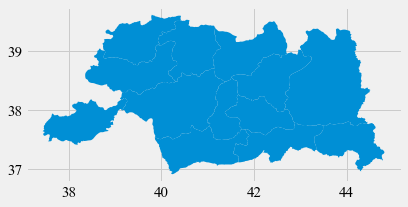

In [43]:
ohal_cities.plot() #finally our ohal city is ready.

## Final plot!

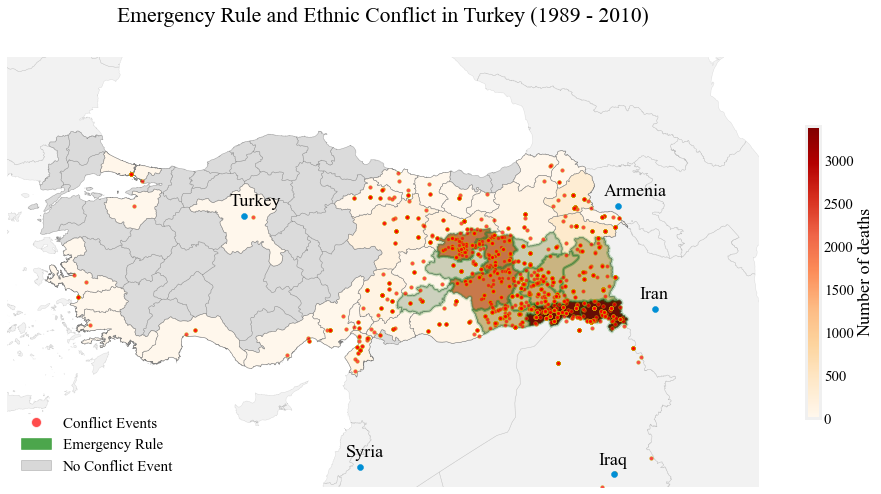

In [46]:
# reset the plot configurations to default
#plt.rcdefaults()

plt.style.use('fivethirtyeight')
plt.rcParams.update({'font.size': 15}) #to set font size for all properties of plot
plt.rcParams.update({'font.sans-serif':'Times New Roman'}) #or 'helvetica'

fig, ax= plt.subplots(figsize=(15, 10))


world.plot(ax=ax, alpha=0.1, color='gray', edgecolor='k')
tr_geo.plot(ax=ax, alpha=0.2, color='gray', edgecolor='k')
tr_geo_ucpd_agg.plot(column='total_deaths', cmap='OrRd', ax=ax, edgecolor='gray',legend=True,legend_kwds={'shrink': 0.5, 'label':'Number of deaths'})
ohal_cities.plot(column='ohal', cmap='Greens_r', ax=ax, alpha=0.2, edgecolor='green', lw=3)
geo_event.plot(ax=ax, c='r', alpha=0.7, edgecolor='y',markersize=14)

city_geo.plot(ax=ax)
for x, y, label in zip(city_geo.geometry.x, city_geo.geometry.y, city_geo.city):
    ax.annotate(label,size=18, xy=(x, y), xytext=(-15, 10), textcoords="offset points")

ax.axis([25,49, 33,44])  
ax.set_title('Emergency Rule and Ethnic Conflict in Turkey (1989 - 2010)',pad=35)
ax.grid(False)


from matplotlib.patches import Patch
from matplotlib.lines import Line2D

legend_elements = [Line2D([0], [0], marker='o', color='w', label='Conflict Events',
                          markerfacecolor='r', markersize=10, alpha=0.7),
                   Patch(facecolor='Green', edgecolor='green',
                         label='Emergency Rule',alpha=0.7),
                  Patch(facecolor='Gray', edgecolor='k',
                         label='No Conflict Event', alpha=0.3)]
ax.legend(handles=legend_elements, loc='lower left', fontsize=15,shadow=False, frameon=False)


plt.axis('off')
#fig.tight_layout()
fig.set_facecolor("w")
plt.show()

# fig.savefig('ucpd_event_2011_survey_ohal.pdf',bbox_inches='tight', dpi=300)
# fig.savefig('ucpd_event_2011_survey_ohal.png',bbox_inches='tight', dpi=300)